# Mini Project: Unsupervised Learning with Kaggle Heights dataset

In previous chapter, you have worked with Supervised Learning data, now in this chapter, let's confront with another type of ML problem, which is Unsupervised Learning

https://www.kaggle.com/majyhain/height-of-male-and-female-by-country-2022

![image](https://user-images.githubusercontent.com/43855029/156072300-db4c4630-6653-4fea-9fed-76925011b855.png)

_**Project description:**_
The metric system is used in most nations to measure height.Despite the fact that the metric system is the most widely used measurement method, we will offer average heights in both metric and imperial units for each country.To be clear, the imperial system utilises feet and inches to measure height, whereas the metric system uses metres and centimetres.Although switching between these measurement units is not difficult, countries tend to choose one over the other in order to maintain uniformity.


For simpilicity: I downloaded the data for you and put the data table here:
https://raw.githubusercontent.com/vuminhtue/SMU_Machine_Learning_Python/master/data/Height%20of%20Male%20and%20Female%20by%20Country%202022.csv

## 10.1 Understand the data


There is only 1 csv file: Height of Male and Female by Country 2022

The dataset contains six columns:
• Rank
• Country Name
• Male height in Cm
• Female height in Cm
• Male height in Ft
• Female height in Ft


**Objective:**
- We will use Unsupervised ML to classify the groups of countries having similar heights of male and female
- Visualize the output


## Step 1: Load data from Kaggle Heights dataset

In [1]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/vuminhtue/SMU_Machine_Learning_Python/master/data/Height%20of%20Male%20and%20Female%20by%20Country%202022.csv")
df.head()

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft
0,1,Netherlands,183.78,170.36,6.03,5.59
1,2,Montenegro,183.30,169.96,6.01,5.58
2,3,Estonia,182.79,168.66,6.00,5.53
3,4,Bosnia and Herzegovina,182.47,167.47,5.99,5.49
4,5,Iceland,182.10,168.91,5.97,5.54


In [10]:
# Select only Male and Female Height in Ft
X = df[["Male Height in Ft","Female Height in Ft"]]


In [11]:
X.head()

,Male Height in Ft,Female Height in Ft
0,6.03,5.59
1,6.01,5.58
2,6.00,5.53
3,5.99,5.49
4,5.97,5.54


## Step 2: Find the optimal K values:

- Using WSS method:



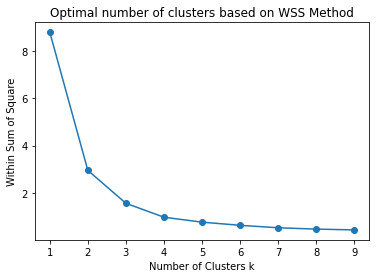

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wss = []
for k in range(1,10):
    model = KMeans(n_clusters=k).fit(X)
    wss.append(model.inertia_)
    
plt.scatter(range(1,10),wss)
plt.plot(range(1,10),wss)
plt.xlabel("Number of Clusters k")
plt.ylabel("Within Sum of Square")
plt.title("Optimal number of clusters based on WSS Method")
plt.show()

## Step 3: Apply K-Means and plot the clusters:

In [16]:
X["Male Height in Ft"]

0      6.03
1      6.01
2      6.00
3      5.99
4      5.97
       ... 
194    5.39
195    5.35
196    5.35
197    5.34
198    5.25
Name: Male Height in Ft, Length: 199, dtype: float64

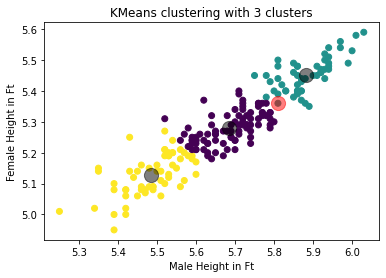

In [62]:
model_KMeans = KMeans(n_clusters=3)
model_KMeans.fit(X)
centers = model_KMeans.cluster_centers_
df[df["Country Name"]=="United States"]["Male Height in Ft"]
USx = df[df["Country Name"]=="United States"]["Male Height in Ft"]
USy = df[df["Country Name"]=="United States"]["Female Height in Ft"]

plt.scatter(X["Male Height in Ft"],X["Female Height in Ft"],c=model_KMeans.labels_)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.scatter(USx, USy, c='red', s=200, alpha=0.5);

plt.xlabel("Male Height in Ft")
plt.ylabel("Female Height in Ft")
plt.title('KMeans clustering with 3 clusters')
plt.show()

In [34]:
df["Clusters"] = model_KMeans.labels_

In [ ]:
df[df["Clusters"]==0]